In [1]:
import os
import gc
import pandas as pd
import numpy as np
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler


from pyInfinityFlow.InfinityFlow_Utilities import move_features_to_silent
from pyInfinityFlow.InfinityFlow_Utilities import anndata_to_df
from pyInfinityFlow.InfinityFlow_Utilities import read_fcs_into_anndata
from pyInfinityFlow.InfinityFlow_Utilities import apply_logicle_to_anndata
from pyInfinityFlow.fcs_io import FCSFileObject

os.chdir("/media/kyle_storage/kyle_ferchen/grimes_lab_main/analysis/2022_12_07_new_multilin_panel/")

In [2]:
### Helper Functions
"""
scale_feature : this function is designed to remove outliers and fit the distribution into the range (0,1)

    parameters:
        input_array : (list-like), the feature values to scale
        min_threshold_percentile: (number between 0 to 100 inclusive), the minimum value for the input domain to be accepted, 
                        outliers below the percentile value given by this parameter will take on that minimum value
        max_threshold_percentile: (number between 0 to 100 inclusive), the maximum value for the input domain to be accepted, 
                        outliers above the percentile value given by this parameter will take on the maximum value

"""
def scale_feature(input_array, min_threshold_percentile, max_threshold_percentile):
    input_array = np.array(list(input_array))
    min_threshold = np.percentile(input_array, min_threshold_percentile)
    max_threshold = np.percentile(input_array, max_threshold_percentile)
    input_array[input_array < min_threshold] = min_threshold
    input_array[input_array > max_threshold] = max_threshold
    return(MinMaxScaler().fit(input_array.reshape(-1,1)).transform(input_array.reshape(-1,1)).reshape(-1,))

In [3]:
umap_2d = pd.read_csv("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "umap_2d_coordinates_redo.csv", index_col=0)

umap_2d

,umap-x,umap-y
cell_id,,
:0,10.952296,-6.878245
:1,10.202045,7.717799
:2,12.240065,-3.202506
:3,6.748181,21.352978
:4,9.314702,5.906703
...,...,...
:1935032,-4.400203,-1.029844
:1935033,12.978972,-5.007983
:1935034,10.876128,5.335987


In [4]:
# Read in the flow data
path_fcs_data = "output/automated_py3_cellharmony_r7/fcs/"

flow = read_fcs_into_anndata(os.path.join(\
    path_fcs_data,
    "infinity_flow_r7_labels_added_redo.fcs"))

flow.var.loc[["r7_number", "r7_rho"], "USE_LOGICLE"] = False
flow

AnnData object with n_obs × n_vars = 1935037 × 151
    obs: 'cell_number'
    var: 'name', 'USE_LOGICLE', 'LOGICLE_T', 'LOGICLE_W', 'LOGICLE_M', 'LOGICLE_A', 'LOGICLE_APPLIED', 'IMPUTED'

In [5]:
print(flow.var.to_string())

                                            name  USE_LOGICLE  LOGICLE_T  LOGICLE_W  LOGICLE_M  LOGICLE_A  LOGICLE_APPLIED  IMPUTED
APC-A                                      CD371         True  3000000.0        0.0        3.0        1.0            False    False
APC-Cy7-A                                   CD48         True  3000000.0        0.0        3.0        1.0            False    False
AlexaFluor647-A                             CD55         True  3000000.0        0.0        3.0        1.0            False    False
AlexaFluor700-A                             Ly6G         True  3000000.0        0.0        3.0        1.0            False    False
BUV395-A                                 CD16_32         True  3000000.0        0.0        3.0        1.0            False    False
BUV615-A                                   ITGB7         True  3000000.0        0.0        3.0        1.0            False    False
BUV737-A                                    CD27         True  3000000.0    

In [6]:
apply_logicle_to_anndata(flow)

In [7]:
i_sampled = pd.read_csv("output/automated_py3_cellharmony_r7/"\
    "evenly_sampled_r7/list_evenly_sampled_cells_redo.csv",
    header=None).iloc[:,0].values

i_sampled

array([':1530', ':3945', ':8052', ..., ':344154', ':836533', ':7039'],
      dtype=object)

In [8]:
print(flow.var.to_string())

                                            name  USE_LOGICLE  LOGICLE_T  LOGICLE_W  LOGICLE_M  LOGICLE_A  LOGICLE_APPLIED  IMPUTED
APC-A                                      CD371         True  3000000.0        0.0        3.0        1.0             True    False
APC-Cy7-A                                   CD48         True  3000000.0        0.0        3.0        1.0             True    False
AlexaFluor647-A                             CD55         True  3000000.0        0.0        3.0        1.0             True    False
AlexaFluor700-A                             Ly6G         True  3000000.0        0.0        3.0        1.0             True    False
BUV395-A                                 CD16_32         True  3000000.0        0.0        3.0        1.0             True    False
BUV615-A                                   ITGB7         True  3000000.0        0.0        3.0        1.0             True    False
BUV737-A                                    CD27         True  3000000.0    

Plotting APC-A...
Plotting APC-Cy7-A...
Plotting AlexaFluor647-A...
Plotting AlexaFluor700-A...
Plotting BUV395-A...
Plotting BUV615-A...
Plotting BUV737-A...
Plotting BUV805-A...
Plotting BV421-A...
Plotting BV480-A...
Plotting BV510-A...
Plotting BV570-A...
Plotting BV605-A...
Plotting BV650-A...
Plotting BV711-A...
Plotting BV750-A...
Plotting BV785-A...
Plotting GFP-A...
Plotting PE-A...
Plotting PE-Cy5-A...
Plotting PE-Cy5.5-A...
Plotting PE-Cy7-A...
Plotting PacificBlue-A...
Plotting PerCP-Cy5.5-A...
Plotting PerCP-eFluor710-A...
Plotting leiden...
Plotting Time...
Plotting SSC-W...
Plotting SSC-H...
Plotting SSC-A...
Plotting FSC-W...
Plotting FSC-H...
Plotting FSC-A...
Plotting SSC-B-W...
Plotting SSC-B-H...
Plotting SSC-B-A...
Plotting LIVEDEADBlue-A...
Plotting AF-A...
Plotting umap-x...
Plotting umap-y...
Plotting Bhlhe40-GFP...
Plotting CD102...
Plotting CD107a...
Plotting CD115...
Plotting CD11a...
Plotting CD11c...
Plotting CD123...
Plotting CD124...
Plotting CD126...
Plo

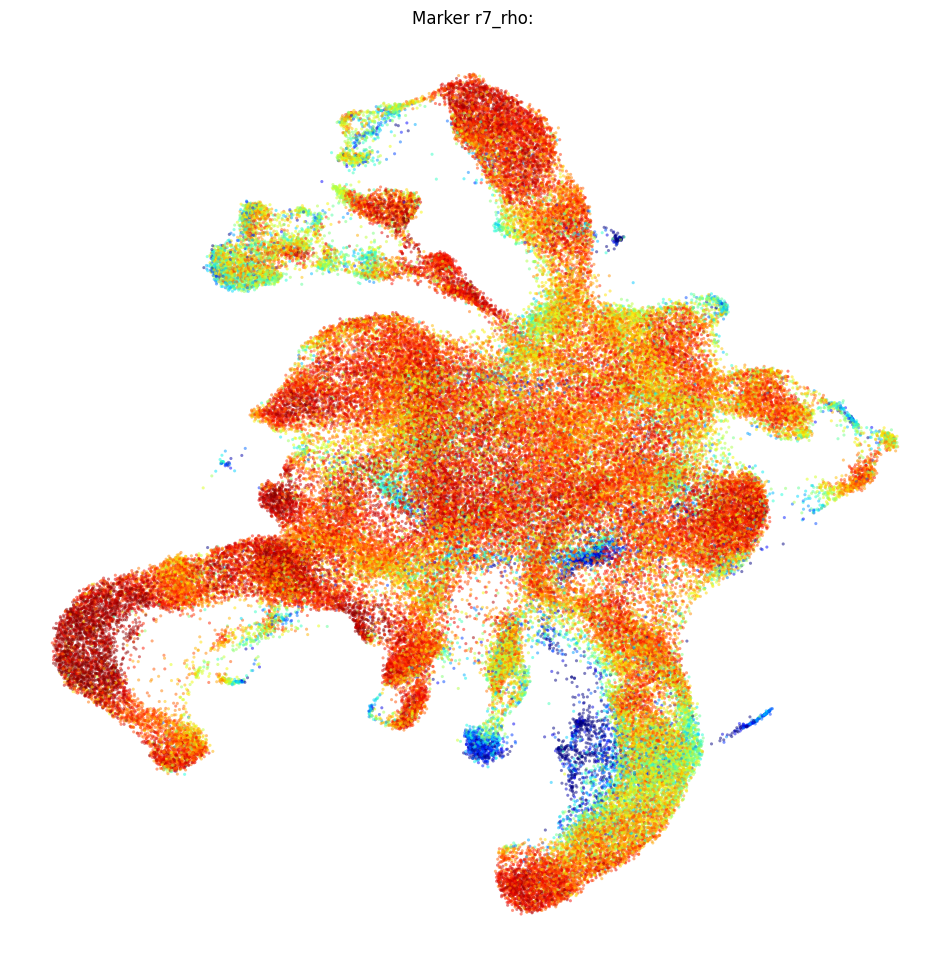

In [9]:
path_figures = "output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "normalized_marker_expression_over_2d_umap/"

for tmp_marker in flow.var.index.values:
    print("Plotting {}...".format(tmp_marker))
    plt.close("all")
    fig, ax = plt.subplots(figsize=(12,12))

    exp_vector = flow[i_sampled, tmp_marker].X.toarray().reshape(-1)
    exp_vector[np.isinf(exp_vector)] = 0

    exp_vector = scale_feature(exp_vector, 1, 99)

    ax.scatter(\
        umap_2d.loc[i_sampled, 'umap-x'], 
        umap_2d.loc[i_sampled, 'umap-y'],
        c=exp_vector,
        cmap="jet",
        # color="purple",
        edgecolors='none',
        s=5, 
        alpha=0.5)

    # ax.set_xlim(umap_bounds.iloc[0,:].values)
    # ax.set_ylim(umap_bounds.iloc[1,:].values)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Marker {}: {}".format(\
        tmp_marker, flow.var.loc[tmp_marker, "name"]))
    plt.savefig(os.path.join(path_figures, "{}-{}.pdf".format(\
        tmp_marker, flow.var.loc[tmp_marker, "name"])))

In [32]:
tmp_marker

'CD11c'

In [33]:
exp_vector = flow[i_sampled, tmp_marker].X.toarray().reshape(-1)

array([ True,  True,  True, ...,  True,  True,  True])

Text(0.5, 1.0, 'Marker CD11c: Imputed_CD11c')

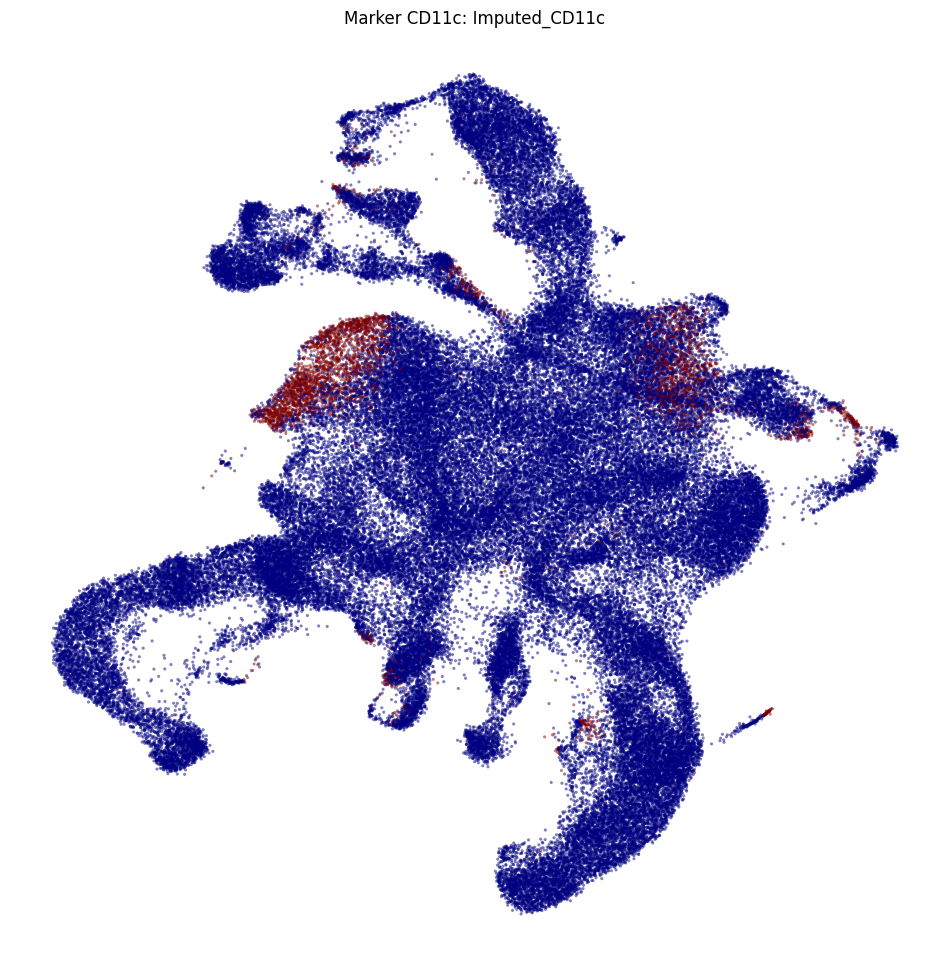

In [46]:
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))

exp_vector = flow[i_sampled, tmp_marker].X.toarray().reshape(-1)
exp_vector[np.isinf(exp_vector)] = 0

exp_vector = scale_feature(exp_vector, 1, 99)

ax.scatter(\
    umap_2d.loc[i_sampled, 'umap-x'], 
    umap_2d.loc[i_sampled, 'umap-y'],
    c=exp_vector,
    cmap="jet",
    # color="purple",
    edgecolors='none',
    s=5, 
    alpha=0.5)

# ax.set_xlim(umap_bounds.iloc[0,:].values)
# ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Marker {}: {}".format(\
    tmp_marker, flow.var.loc[tmp_marker, "name"]))